In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

# Display first few rows
print(X.head())
print(y.head())

# Basic stats
print(X.describe())
print(X.info())

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

2. Correlation Between Features

Numerical Features: Correlation matrix with Pearson correlation for numeric features.

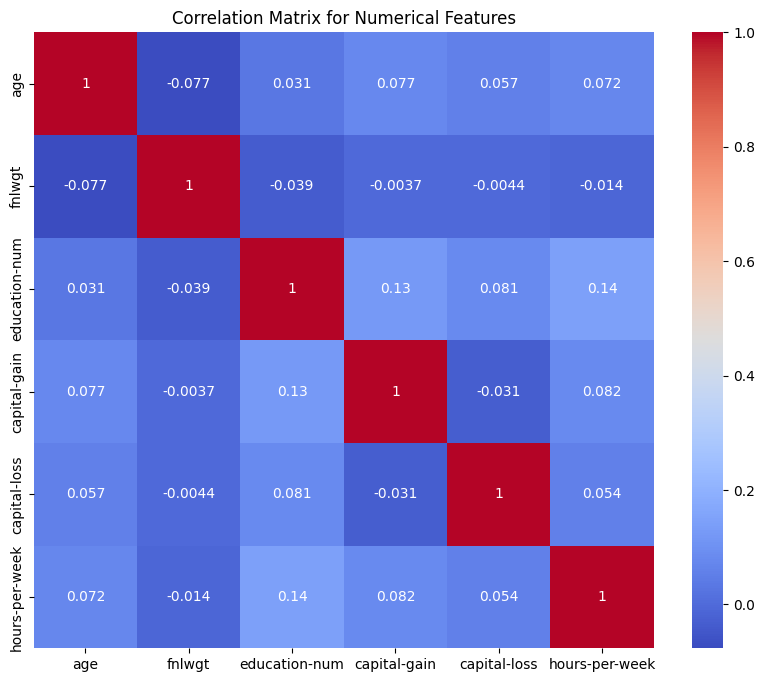

In [8]:
# Numerical Correlation Matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for numeric features only
numeric_features = X.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_features.corr()

# Plotting correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()


3. Feature Impact on Target
For binary classification (predicting income), analyzing the impact of individual features can reveal important insights:

Boxplots for Numerical Features: Show distributions of numerical features across target classes.
Count plots for Categorical Features: Visualize distribution of categorical variables across income levels.

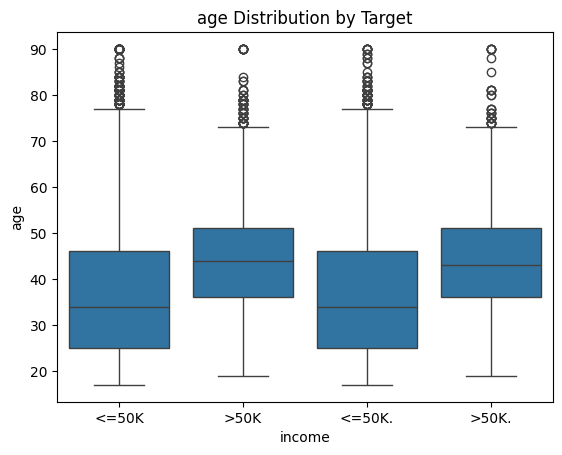

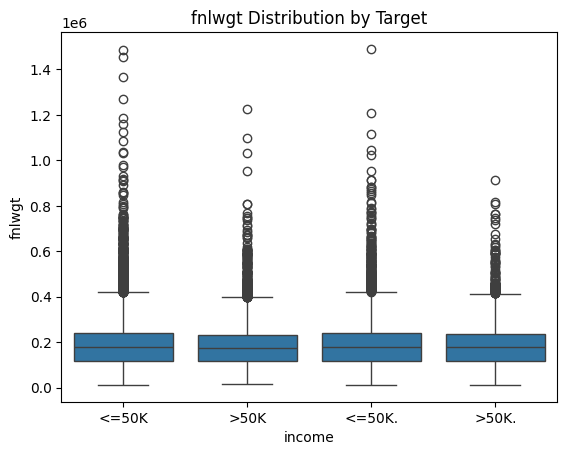

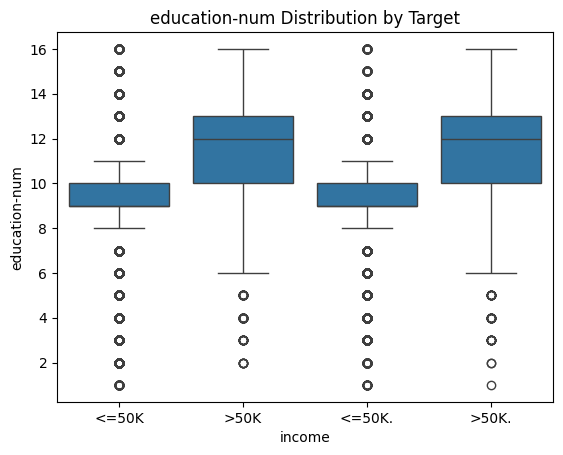

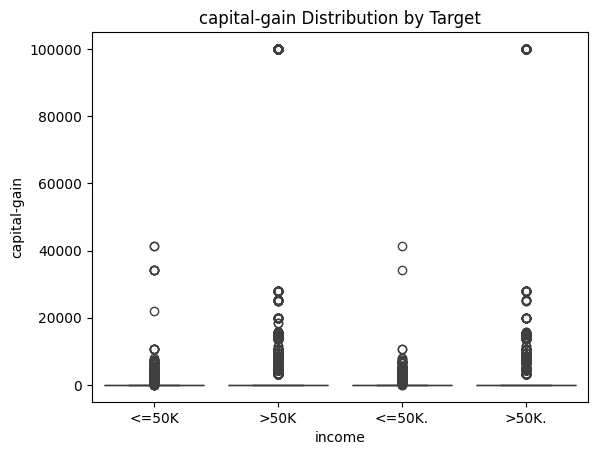

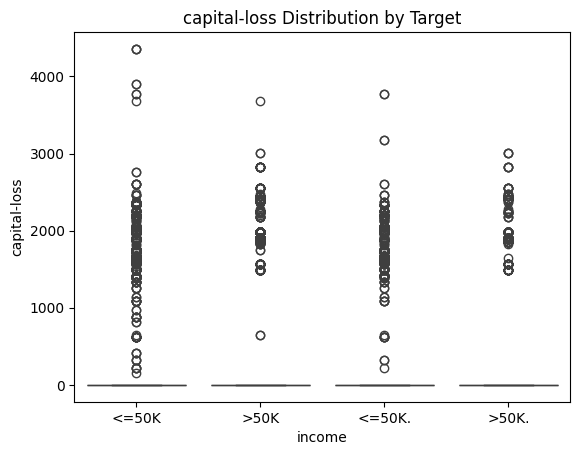

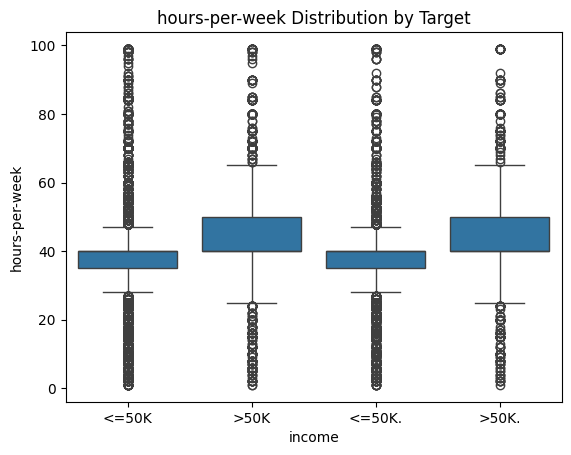

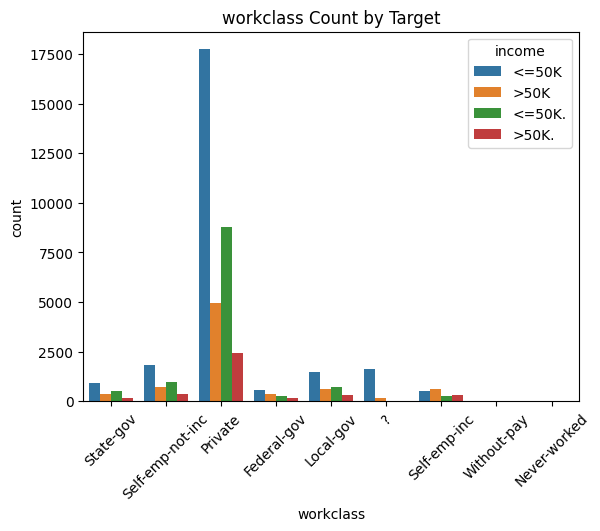

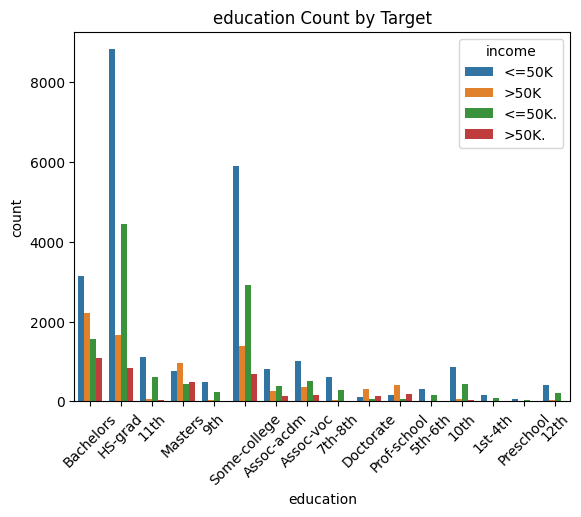

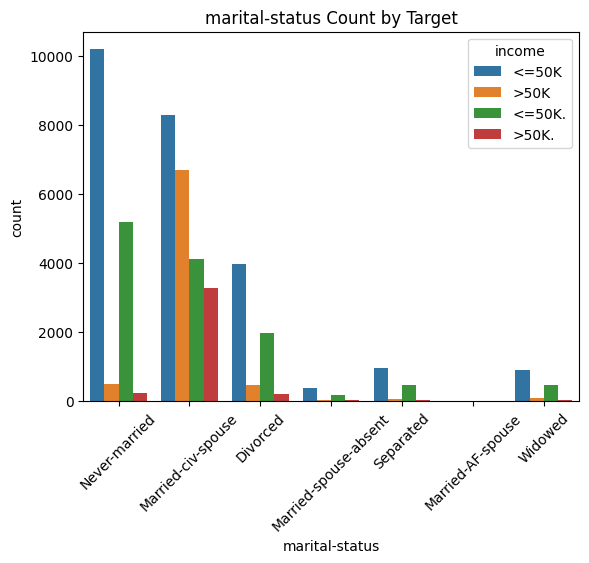

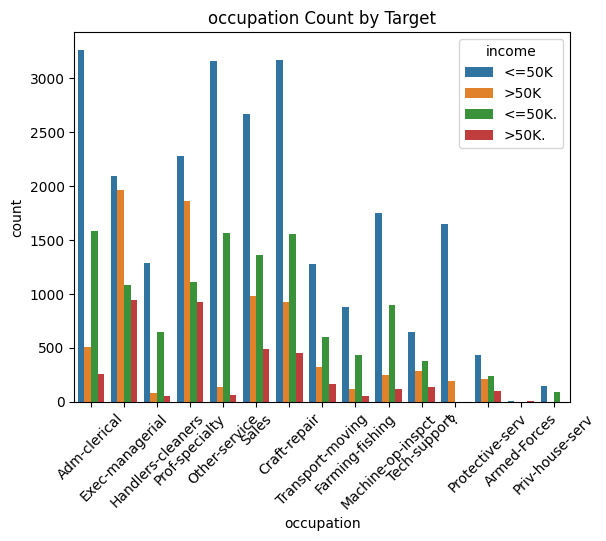

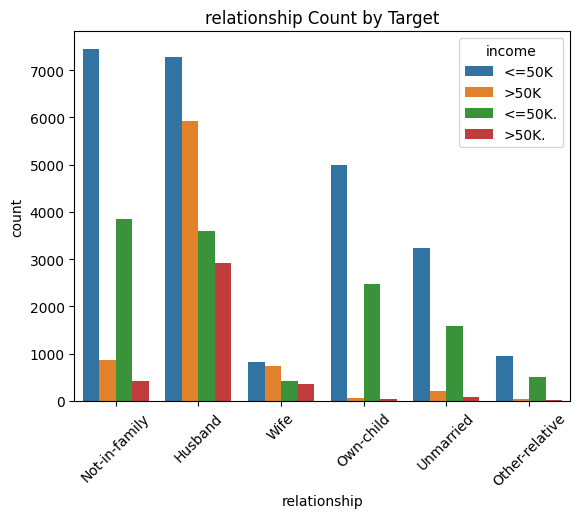

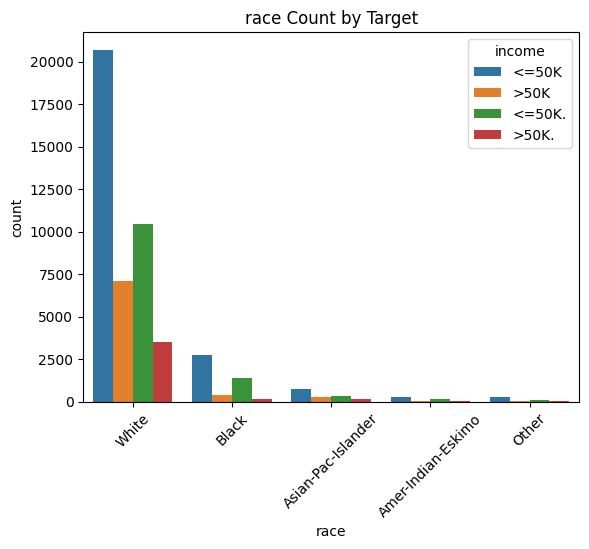

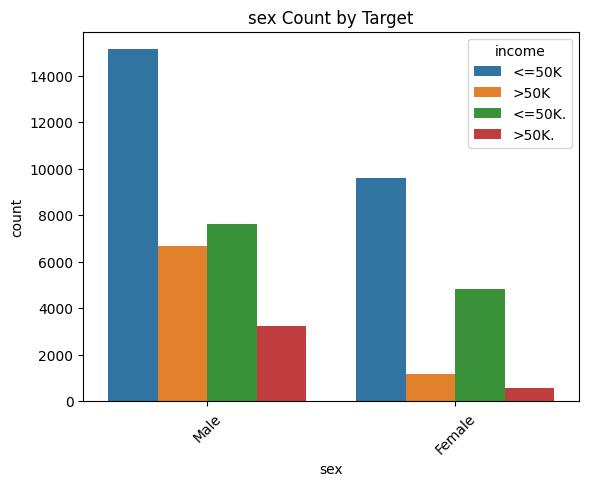

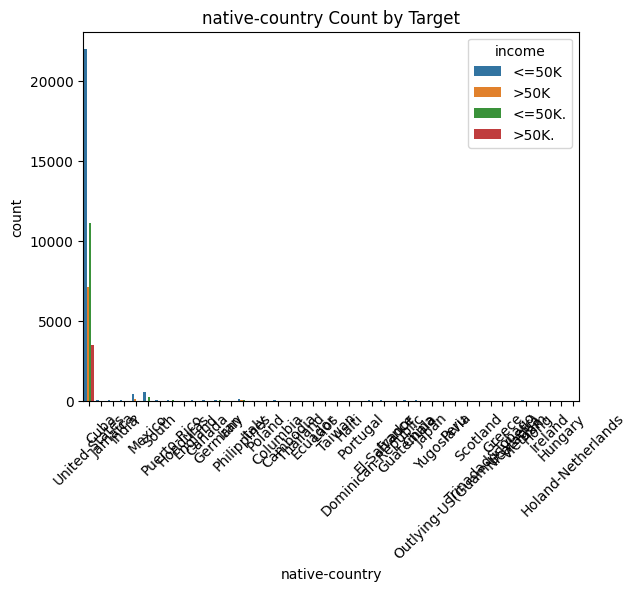

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define numeric and categorical features using `X` from Code 1
numeric_features = X.select_dtypes(include=['int64', 'float64'])
categorical_features = X.select_dtypes(include=['object', 'category'])

# Ensure y is a Series
y_series = y.squeeze()  # If y is a DataFrame, this will convert it to a Series

# Visualize numerical feature impact on the target
for column in numeric_features.columns:
    sns.boxplot(x=y_series, y=numeric_features[column])
    plt.title(f"{column} Distribution by Target")
    plt.show()

# Visualize categorical feature impact on the target
for column in categorical_features.columns:
    sns.countplot(x=categorical_features[column], hue=y_series)
    plt.title(f"{column} Count by Target")
    plt.xticks(rotation=45)
    plt.show()

4. Independence Assumptions
Checking Independence Between Features: Apply statistical tests to determine independence (e.g., Chi-square for categorical, Pearson’s for continuous).

In [12]:
# Chi-square Test for Independence (Categorical Features)

from ucimlrepo import fetch_ucirepo
import pandas as pd
from scipy.stats import chi2_contingency

# Fetch dataset
adult = fetch_ucirepo(id=2)

# Define features (X) and targets (y)
X = adult.data.features
y = adult.data.targets

# Selecting categorical columns
categorical_features = X.select_dtypes(include=['object'])

# Chi-square Test for Independence (Categorical Features)
for column in categorical_features.columns:
    contingency_table = pd.crosstab(X[column], y.squeeze())  # Ensure y is a Series
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Feature: {column}, p-value: {p}")
    if p < 0.05:
        print(f"{column} is dependent on the target.")
    else:
        print(f"{column} is independent of the target.")

Feature: workclass, p-value: 0.0
workclass is dependent on the target.
Feature: education, p-value: 0.0
education is dependent on the target.
Feature: marital-status, p-value: 0.0
marital-status is dependent on the target.
Feature: occupation, p-value: 0.0
occupation is dependent on the target.
Feature: relationship, p-value: 0.0
relationship is dependent on the target.
Feature: race, p-value: 3.4347723295010175e-98
race is dependent on the target.
Feature: sex, p-value: 0.0
sex is dependent on the target.
Feature: native-country, p-value: 2.1525667073421703e-102
native-country is dependent on the target.


1. PCA: Reduces data to 2 principal components based on variance.
2. t-SNE: Reduces data to 2 dimensions while preserving local structures.
3. UMAP: Another non-linear method, often better at preserving global structure compared to t-SNE.

In [13]:
!pip install umap-learn

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


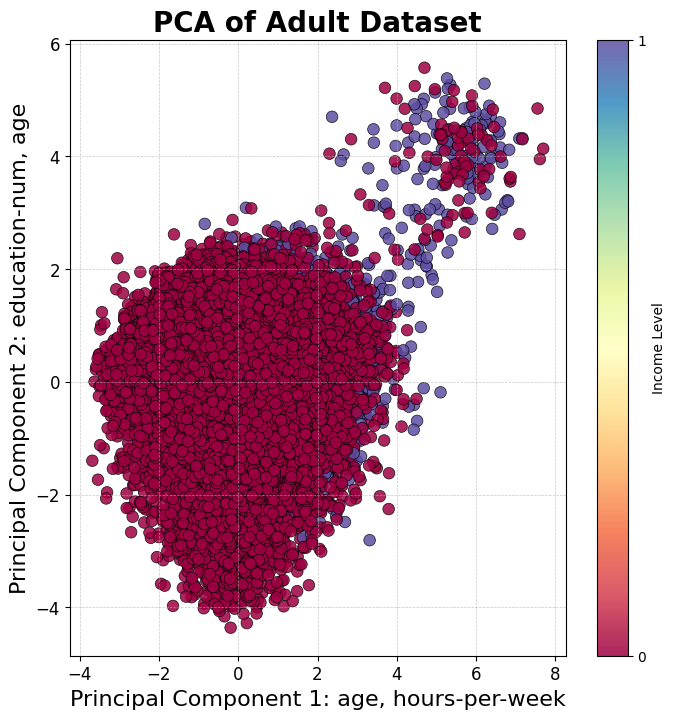

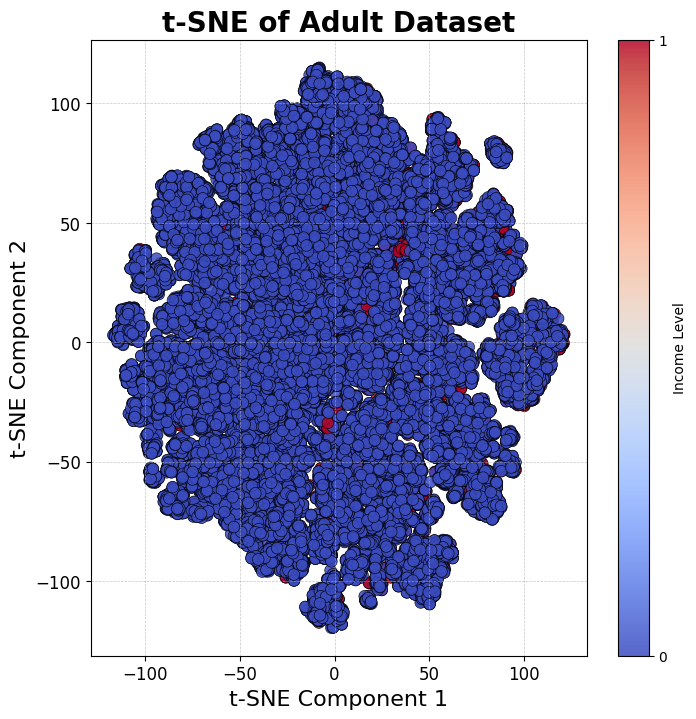

/opt/homebrew/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


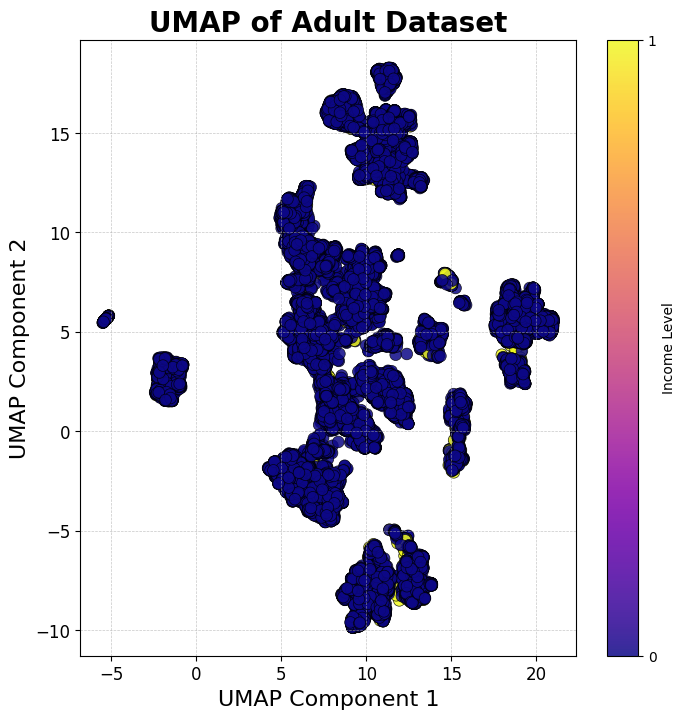

In [14]:
# Convert y to a Series if it is a DataFrame to avoid ambiguity

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import umap
from ucimlrepo import fetch_ucirepo

# Load dataset
adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets

# Ensure y is a Series if needed
y_series = y.squeeze()
y_numeric = y_series.apply(lambda x: 1 if x == '>50K' else 0)

# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Create preprocessing pipelines
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Fit and transform the data
X_prepared = preprocessor.fit_transform(X)

# Apply PCA on the preprocessed data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_prepared)

# Get feature names after preprocessing for labeling purposes
feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))

# Extract feature loadings for component labeling
loadings = pca.components_.T
top_features_pc1 = [feature_names[i] for i in abs(loadings[:, 0]).argsort()[::-1][:2]]
top_features_pc2 = [feature_names[i] for i in abs(loadings[:, 1]).argsort()[::-1][:2]]
pc1_label = f'Principal Component 1: {top_features_pc1[0]}, {top_features_pc1[1]}'
pc2_label = f'Principal Component 2: {top_features_pc2[0]}, {top_features_pc2[1]}'

# PCA Plot
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='Spectral', alpha=0.85, edgecolor='k', s=70, linewidth=0.5)
plt.colorbar(label='Income Level', ticks=[0, 1])
plt.xlabel(pc1_label, fontsize=16)
plt.ylabel(pc2_label, fontsize=16)
plt.title('PCA of Adult Dataset', fontsize=20, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

# t-SNE Implementation
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_prepared)

plt.figure(figsize=(8, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_numeric, cmap='coolwarm', alpha=0.85, edgecolor='k', s=70, linewidth=0.5)
plt.colorbar(label='Income Level', ticks=[0, 1])
plt.xlabel('t-SNE Component 1', fontsize=16)
plt.ylabel('t-SNE Component 2', fontsize=16)
plt.title('t-SNE of Adult Dataset', fontsize=20, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

# UMAP Implementation
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_prepared)

plt.figure(figsize=(8, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_numeric, cmap='plasma', alpha=0.85, edgecolor='k', s=70, linewidth=0.5)
plt.colorbar(label='Income Level', ticks=[0, 1])
plt.xlabel('UMAP Component 1', fontsize=16)
plt.ylabel('UMAP Component 2', fontsize=16)
plt.title('UMAP of Adult Dataset', fontsize=20, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


To train a simple model on the UCI Adult dataset using a Random Forest classifier, we’ll follow these steps:

Preprocess the Data: Scale numerical features and one-hot encode categorical features.
Split the Data: Create a validation set to tune hyperparameters and set up early stopping.
Cross-Validation: Use cross-validation to evaluate the model's performance.
Train the Model with Early Stopping and Hyperparameter Tuning: Use the validation set to tune hyperparameters.
Analyze Performance and Identify Potential Pitfalls: Evaluate and interpret the model's performance, and discuss potential issues.

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best hyperparameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None, 'classifier__class_weight': 'balanced'}
Test Accuracy: 0.845

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8201
           1       0.53      0.33      0.41      1568

    accuracy                           0.85      9769
   macro avg       0.70      0.64      0.66      9769
weighted avg       0.82      0.85      0.83      9769



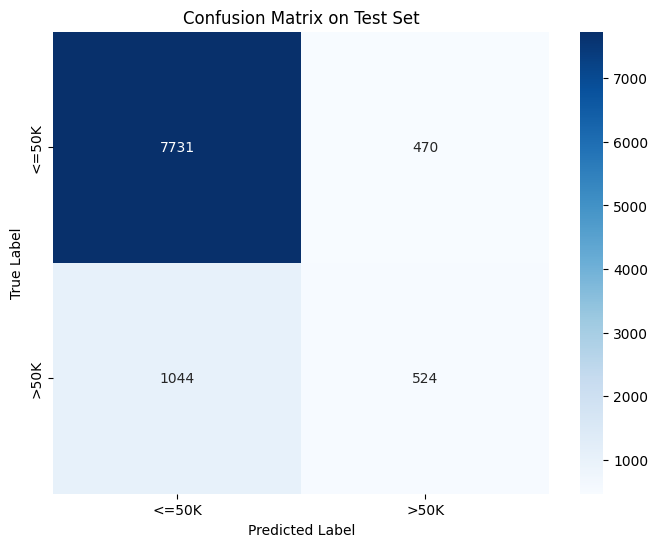

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets.squeeze()
y = y.apply(lambda x: 1 if x == '>50K' else 0)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define preprocessing
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=True, handle_unknown='ignore'))
])
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Define model pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Optimized parameter grid
param_grid = {
    'classifier__n_estimators': [100, 150],  # Reduced for faster execution
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__class_weight': ['balanced']
}

# Randomized search with reduced iterations for 10-fold cross-validation
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=10,  # Reduced iterations for faster performance
    cv=StratifiedKFold(n_splits=10),
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_
print(f"Best hyperparameters: {random_search.best_params_}")

# Test set evaluation
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.3f}")

# Classification report and confusion matrix
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix on Test Set")
plt.show()

Code to Plot Test Set Classification Metrics:

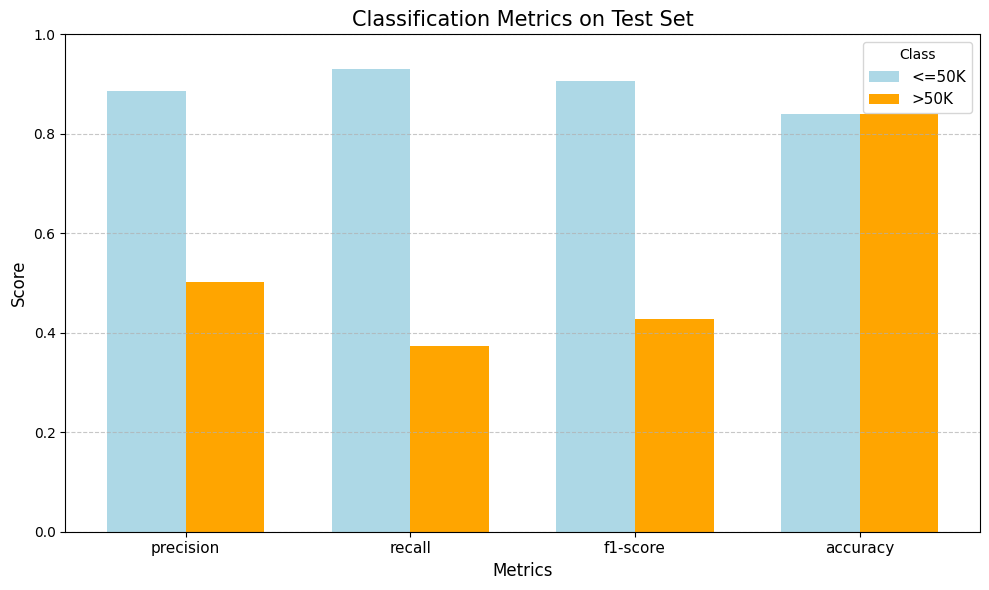

In [20]:
# Import necessary libraries for plotting
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Generate classification report as a dictionary
report = classification_report(y_test, y_test_pred, target_names=['<=50K', '>50K'], output_dict=True)

# Extract precision, recall, and F1-score for each class
metrics = ['precision', 'recall', 'f1-score']
class_labels = ['<=50K', '>50K']
data = {metric: [report[label][metric] for label in class_labels] for metric in metrics}

# Add overall accuracy
data['accuracy'] = [report['accuracy']] * len(class_labels)

# Prepare data for plotting
x_labels = metrics + ['accuracy']
class_metrics = np.array([data[metric] for metric in x_labels]).T

# Set up the bar graph
x = np.arange(len(x_labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, class_metrics[0], width, label='<=50K', color='lightblue')
plt.bar(x + width/2, class_metrics[1], width, label='>50K', color='orange')

# Customize the plot
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Classification Metrics on Test Set', fontsize=15)
plt.xticks(ticks=x, labels=x_labels, fontsize=11)
plt.ylim(0, 1)
plt.legend(title='Class', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Experiment 1: Feature Importance-Based Feature Selection

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load dataset
adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets.squeeze()
y = y.apply(lambda x: 1 if x == '>50K' else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Preprocessing pipeline
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Define and fit Random Forest
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])
pipeline.fit(X_train, y_train)

# Feature importance analysis
rf_model = pipeline.named_steps['classifier']
feature_names = numerical_features + list(pipeline.named_steps['preprocessor']
                                          .transformers_[1][1]['onehot']
                                          .get_feature_names_out(categorical_features))
importances = rf_model.feature_importances_

# Select top 10 features
important_features = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10).index.tolist()

# Transform X_train and X_test to match transformed features
X_train_transformed = pd.DataFrame(
    pipeline.named_steps['preprocessor'].transform(X_train),
    columns=feature_names
)
X_test_transformed = pd.DataFrame(
    pipeline.named_steps['preprocessor'].transform(X_test),
    columns=feature_names
)

# Reduce transformed dataset to important features
X_train_reduced = X_train_transformed[important_features]
X_test_reduced = X_test_transformed[important_features]

# Train again with selected features
pipeline_reduced = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])
pipeline_reduced.fit(X_train_reduced, y_train)

# Evaluate performance
y_test_pred = pipeline_reduced.predict(X_test_reduced)
print(f"Test Accuracy with Reduced Features: {accuracy_score(y_test, y_test_pred):.3f}")
print("\nClassification Report with Reduced Features:")
print(classification_report(y_test, y_test_pred))

Test Accuracy with Reduced Features: 0.840

Classification Report with Reduced Features:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      8201
           1       0.50      0.37      0.43      1568

    accuracy                           0.84      9769
   macro avg       0.69      0.65      0.67      9769
weighted avg       0.82      0.84      0.83      9769

